In [1]:
import pandas as pd
import numpy as np

In [2]:
ds = pd.read_csv(r"C:\Users\HP\Desktop\DSP_42\naive_bayes_classifier (21-12-2023)\spam.csv",encoding='unicode_escape')

In [3]:
ds.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
ds.shape

(5570, 2)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5570 non-null   object
 1   Message   5570 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
ds.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
ds.nunique()

Category       2
Message     5155
dtype: int64

In [8]:
ds.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
ds['Category']=ds['Category'].astype('category')
ds['Category']=ds['Category'].cat.codes

In [10]:
ds.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
ds['Category'].value_counts()

Category
0    4825
1     745
Name: count, dtype: int64

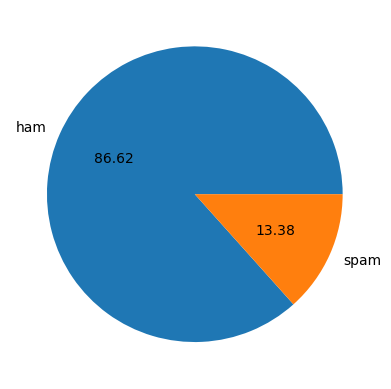

In [12]:
import matplotlib.pyplot as plt
plt.pie(ds['Category'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ds.Message,ds.Category,test_size=0.2)

In [16]:
x_train

3586    Our ride equally uneventful - not too many of ...
3334            Sorry, got a late start, we're on the way
2041       Me not waking up until 4 in the afternoon, sup
3504               life alle mone,eppolum oru pole allalo
1053    HIYA COMIN 2 BRISTOL 1 ST WEEK IN APRIL. LES G...
                              ...                        
5236                     Yeah I can still give you a ride
4291                                                G.W.R
1554    Ok i found dis pierre cardin one which looks n...
2337                            Alright, see you in a bit
1397     No did you check? I got his detailed message now
Name: Message, Length: 4456, dtype: object

In [17]:
y_train

3586    0
3334    0
2041    0
3504    0
1053    0
       ..
5236    0
4291    0
1554    0
2337    0
1397    0
Name: Category, Length: 4456, dtype: int8

In [18]:
x_test

3318                      Kay... Since we are out already
3726        Aldrine, rakhesh ex RTM here.pls call.urgent.
2740    I don't know u and u don't know me. Send CHAT ...
1413    So wats ur opinion abt him and how abt is char...
2995    They released vday shirts and when u put it on...
                              ...                        
1779    BIG BROTHER ALERT! The computer has selected u...
4510    Sorry I missed you babe. I was up late and sle...
4009    Wan2 win a Meet+Greet with Westlife 4 U or a m...
3815                     How long does it take to get it.
4716    K will do, addie &amp; I are doing some art so...
Name: Message, Length: 1114, dtype: object

In [19]:
y_test

3318    0
3726    0
2740    1
1413    0
2995    0
       ..
1779    1
4510    0
4009    1
3815    0
4716    0
Name: Category, Length: 1114, dtype: int8

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x_train_count=vectorizer.fit_transform(x_train.values)
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
x_train[:3]

3586    Our ride equally uneventful - not too many of ...
3334            Sorry, got a late start, we're on the way
2041       Me not waking up until 4 in the afternoon, sup
Name: Message, dtype: object

In [22]:
x_train_count.shape

(4456, 7655)

In [23]:
x_train.shape

(4456,)

In [24]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [25]:
emails=['Hey Neethu, lets get together and watch a movie',
       'Exclusive 20% offer only for you on parking charges ',
       'Exclusive 20% offer only for you on parking charges ',
        'Hey Neethu, lets get together and watch a movie'
       ]

In [26]:
email_count=vectorizer.transform(emails)
email_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
email_count.shape

(4, 7655)

In [28]:
model.predict(email_count)

array([0, 1, 1, 0], dtype=int8)

In [29]:
x_test.shape

(1114,)

In [30]:
x_test

3318                      Kay... Since we are out already
3726        Aldrine, rakhesh ex RTM here.pls call.urgent.
2740    I don't know u and u don't know me. Send CHAT ...
1413    So wats ur opinion abt him and how abt is char...
2995    They released vday shirts and when u put it on...
                              ...                        
1779    BIG BROTHER ALERT! The computer has selected u...
4510    Sorry I missed you babe. I was up late and sle...
4009    Wan2 win a Meet+Greet with Westlife 4 U or a m...
3815                     How long does it take to get it.
4716    K will do, addie &amp; I are doing some art so...
Name: Message, Length: 1114, dtype: object

In [31]:
x_test_count=vectorizer.transform(x_test)

In [32]:
y_predicted=model.predict(x_test_count)
y_predicted

array([0, 0, 1, ..., 1, 0, 0], dtype=int8)

In [33]:
model.score(x_test_count,y_test)

0.9892280071813285